 ###  <center>Dynamic Mapping of the Global Progression of COVID-19 Confirmed Cases with Geopandas 

### <center> Author: Bertrand T. Tameza 

### Importing libraries

In [152]:
import pandas as pd
import numpy as np
import geopandas as gpd
import descartes
import folium as flm
import matplotlib as mpl
import mapclassify as mc
import pillow as PIL        # for animated graphs
import io

ModuleNotFoundError: No module named 'pillow'

### Loading the CSV dataframe

In [26]:
data = pd.read_csv("C:/Users/hp/Desktop/python_geospatial/Dynamic_mapping_covid_19/COVID-19-master/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [36]:
data.shape

(192, 383)

In [27]:
data.head(5)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030


In [29]:
# filter the data to retrieve the data for Canada
data.loc[data['Country/Region'] == "Canada"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21
39,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,122360,122821,123364,123747,124208,124563,124831,125090,125672,126068
40,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,65719,66265,66779,66779,66779,67937,68366,68780,69245,69716
41,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
43,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,28996,29128,29280,29446,29564,29651,29733,29858,29968,30078
44,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,1175,1202,1218,1230,1256,1264,1288,1302,1318,1325
45,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,400,404,408,408,408,408,408,410,411,412
46,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,31,31,35,35,35,35,36,36,36,36
47,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,1576,1576,1577,1580,1580,1581,1582,1583,1584,1584
48,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,282,283,283,284,294,294,294,294,296,296


### Grouping the data by country

In [42]:
data = data.groupby("Country/Region").sum()

In [40]:
### Drop the Lat and Long columns
data = data.drop(columns = ["Lat", "Long"])

### Transpose the dataframe for plotting

In [44]:
data_transposed = data.T

In [45]:
data_transposed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


<AxesSubplot:>

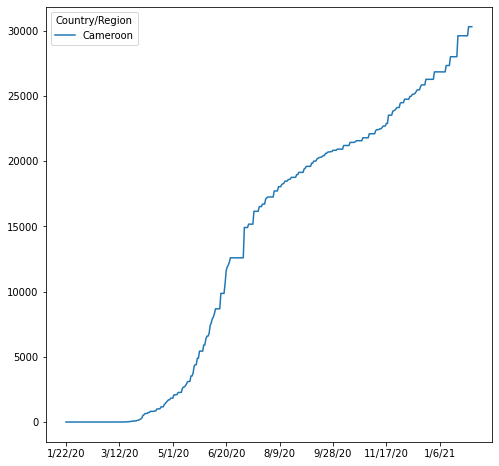

In [51]:
data_transposed.plot(y = ['Cameroon'], use_index = True, figsize = (8,8))

<AxesSubplot:>

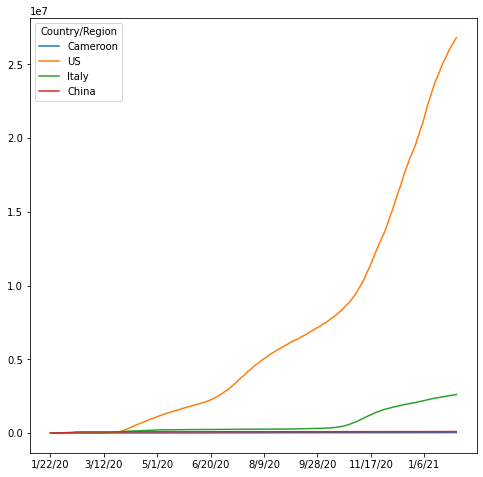

In [50]:
data_transposed.plot(y = ['Cameroon', 'US', 'Italy', 'China'], use_index = True, figsize = (8,8))

### Importing the shape file of the World map

In [112]:
world = gpd.read_file("C:/Users/hp/Desktop/python_geospatial/Dynamic_mapping_covid_19/World_Countries/World_Countries.shp")

<AxesSubplot:>

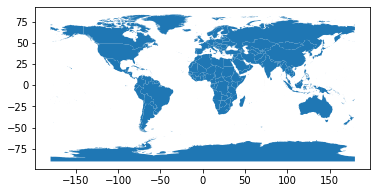

In [57]:
world.plot()

In [58]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [59]:
world.head(20)

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
5,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
6,Armenia,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."
7,Andorra,"POLYGON ((1.44583 42.60194, 1.48653 42.65041, ..."
8,Angola,"MULTIPOLYGON (((13.09139 -4.63306, 13.09264 -4..."
9,American Samoa (US),"POLYGON ((-170.74390 -14.37556, -170.74942 -14..."


In [60]:
world.shape

(252, 2)

In [61]:
data.shape

(192, 381)

In [62]:
data.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265
Albania,0,0,0,0,0,0,0,0,0,0,...,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082
Algeria,0,0,0,0,0,0,0,0,0,0,...,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629
Andorra,0,0,0,0,0,0,0,0,0,0,...,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172
Angola,0,0,0,0,0,0,0,0,0,0,...,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030


###  Checking the names of the countries for anay discrepencies between the two data sources


In [128]:
def check_names():
    count = 0
    for index, row in data.iterrows():
        if index not in world["COUNTRY"].to_list():
            print(index + " is not in the list of the shapefile")
            count += 1
        else:
            pass
    print("There are %d potential mismatches of the countries' names in the two data sources." % count)
check_names()

Burma is not in the list of the shapefile
Cabo Verde is not in the list of the shapefile
Diamond Princess is not in the list of the shapefile
Eswatini is not in the list of the shapefile
Holy See is not in the list of the shapefile
Kosovo is not in the list of the shapefile
MS Zaandam is not in the list of the shapefile
Micronesia is not in the list of the shapefile
West Bank and Gaza is not in the list of the shapefile
There are 9 potential mismatches of the countries' names in the two data sources.


### Curiously some countries like US are said to not be in the shapefile, this suggest perhaps a mispelling of the names of some countries

In [129]:
# Replace the names in the shapefile by the name in the dataframe for all the countries listed, so need to check the proper
# spelling of those names in the shapefile
world.replace('United States', 'US', inplace = True)
world.replace('Democratic Republic of the Congo', 'Congo (Kinshasa)', inplace = True)
world.replace('Congo', 'Congo (Brazzaville)', inplace = True)
world.replace('Czech Republic', 'Czechia', inplace = True)
world.replace('Ivory Coast', "Cote d'Ivoire", inplace = True)
world.replace('South Korea', 'Korea, South', inplace = True)
world.replace('Macedonia', 'North Macedonia', inplace = True)
world.replace('St. Kitts and Nevis', 'Saint Kitts and Nevis', inplace = True)
world.replace('St. Lucia', 'Saint Lucia', inplace = True)
world.replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines', inplace = True)
world.replace('Taiwan', 'Taiwan*', inplace = True)
world.replace('Western Samoa', 'Samoa', inplace = True)
world.replace('East Timor', 'Timor-Leste', inplace = True)

In [130]:
check_names()

Burma is not in the list of the shapefile
Cabo Verde is not in the list of the shapefile
Diamond Princess is not in the list of the shapefile
Eswatini is not in the list of the shapefile
Holy See is not in the list of the shapefile
Kosovo is not in the list of the shapefile
MS Zaandam is not in the list of the shapefile
Micronesia is not in the list of the shapefile
West Bank and Gaza is not in the list of the shapefile
There are 9 potential mismatches of the countries' names in the two data sources.


### Merging the information of the sources (data and world) into one.

In [131]:
merge = world.join(data, on = 'COUNTRY', how = 'right')

In [132]:
type(merge)

geopandas.geodataframe.GeoDataFrame

In [133]:
merge.head(5)

,COUNTRY,geometry,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21
2.0,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",0,0,0,0,0,0,0,0,...,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265
5.0,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",0,0,0,0,0,0,0,0,...,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082
3.0,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",0,0,0,0,0,0,0,0,...,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629
7.0,Andorra,"POLYGON ((1.44583 42.60194, 1.48653 42.65041, ...",0,0,0,0,0,0,0,0,...,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172
8.0,Angola,"MULTIPOLYGON (((13.09139 -4.63306, 13.09264 -4...",0,0,0,0,0,0,0,0,...,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030


### Plotting

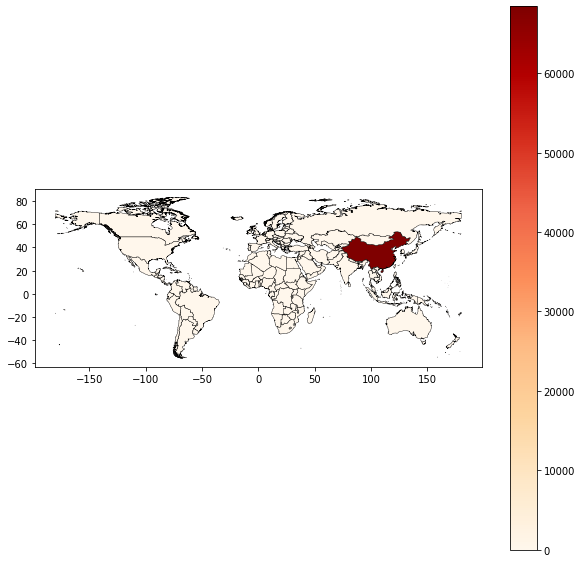

In [138]:
# State of the World by mid february 2020
ax = merge.plot(column = '2/15/20',
                cmap ='OrRd',
                figsize = (10,10),
                legend = True,
                scheme = 'user_defined',
                classification_kwds = {'bins':[10, 20, 50, 100, 500, 1000, 5000, 1000, 500000]}, 
                edgecolor = 'black',
                linewidth = 0.4)

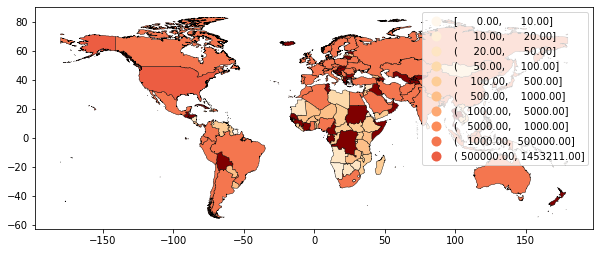

In [144]:
# State of the World by mid May 2020
ax = merge.plot(column = '5/15/20',
                cmap ='OrRd',
                figsize = (10,10),
                legend = True,
                scheme = 'user_defined',
                classification_kwds = {'bins':[10, 20, 50, 100, 500, 1000, 5000, 1000, 500000]}, 
                edgecolor = 'black',
                linewidth = 0.4)

### Automatically generate the plot through different dates

In [151]:
image_frames = []

In [ ]:
for dates in merge.columns.to_list()[2:len(merge.columns.to_list())]:
    # plot
    ax = merge.plot(column = '5/15/20',
                cmap ='OrRd',
                figsize = (14,14),
                legend = True,
                scheme = 'user_defined',
                classification_kwds = {'bins':[10, 20, 50, 100, 500, 1000, 5000, 1000, 500000]}, 
                edgecolor = 'black',
                linewidth = 0.4)
    
    # Add at title and a legend to the map
    ax.set_title('Total confirmed COVID-19 cases', fontdict = {'fontsize':20}, pad = 12.5)
    
    # Removing the axes
    ax.set_axis_off()
    
    # Move the legend
    ax.get_legend().set_bbox_to_anchor((0.18, 0.6))
    
    img = ax.get_figure()
    
    f = io.BytesIO()
    img.savefig(f, 'format' = 'png', bbox_inches = 'tight')          # format of 'format'
    f.seek(0)  # not sure about this argument need to verify
    image_frames.append(PIL.Image.open(f))


# Create a GIF animation
image_frames[0].save('Dynamic COVID-19 Map.gif', format = 'GIF',
                    append_images = image_frames[1:],
                    save_all = True, duration = 300,
                    loop = 3)                    # loop = 0, then infinite animation (restart when the last elt is reached)
# format of 'format'  in the first line
    
f.close()

In [145]:
# Checking the first element of the list of images (the state of the World on the first date)
image_frames[0]

Text(0.5, 1.0, 'Total confirmed COVID-19 cases')

### End of the Notebook